##**Practice Session 1**: Bidimensional Feature Extraction

In [2]:
from google.colab import drive
# Mount GDrive to connect Google Drive and Google Colab for reading/writing data.
drive.mount('/content/drive')

Mounted at /content/drive


### **Feature Extraction for Glaucoma characterization using OCT images**

In this part of the session, the student will become familiar with feature extraction from two-dimensional data. In this sense, the development of **Feature Extraction** (FE) methods on **OCT retinal image** is proposed. This type of image is key in the development of diagnostic aid systems in the field of ophthalmology. Specifically, from this imaging technology it is possible to identify the main causes of blindness in today's society, i.e. Glaucoma, Age-Related Macular Degeneration (AMD) and Diabetic Retinopathy (DR) among others.

We will focus on the development of FE algorithms for the **detection of Glaucoma**. In this sense, we should know that the layer that provides the most information is the **Retinal Nerve Fiber Fiber Layer (RNFL)** since the fibers of this layer are lost in a marked way in patients suffering from this disease, resulting in a narrowing of the same. In addition, **the rest of the layers** are also affected by this disease to a greater or lesser extent.


Taking into account the above motivation, we are going to develop several functions for the extraction of features on this type of images that will allow us in the following practice to develop a Glaucoma detection system. For this purpose, **5 data triples** are provided with their corresponding CSV file with the relevant information of the dataset. Each triplet is made up of the **original image**, the **mask** of the manual segmentation of the **RNFL layer** and a **mask that delimits the retina from the background**.



**EXERCISE 1**. **(a)** This first exercise aims to perform an inspection of the dataset. To do so, a function is provided which, given the OCT image, the RNFL layer mask and the retina mask, generates a figure showing the OCT image in greyscale and superimposing the upper and lower limits of the RNFL layer (from `RNFL_mask`) and the retina borders (from `retina_mask`). Inspect the statements that make up the function and look in the OpenCV documentation for the `findContours()` and `drawContours()` methods.

In [ ]:
import cv2
import matplotlib.pyplot as plt

def OCT_visualizer(image, RNFL_mask, retina_mask):
 # We search for contours of the masks using the function cv2.findContours()
  cont_rnfl, _ = cv2.findContours(RNFL_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cont_retina, _ = cv2.findContours(retina_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # Draw contours on copies of the image using the cv2.drawContours() function
  image_rnfl = cv2.drawContours(image.copy(), cont_rnfl, -1, (255, 0, 0, 0), 3)
  image_retina = cv2.drawContours(image_rnfl.copy(), cont_retina, -1, (0, 255, 0), 3)
  # Show image
  plt.imshow(image_retina, cmap='gray')
  plt.show()

**b)** Once the function has been developed, make a call to it, displaying a random triplet of the provided ones. To do this, read the content of the file **`data_info.csv`** (using the Pandas library) and generate a random number from 0 to the number of instances of the dataset. This number will be the position of the instance to select. Read the instance name, load the triple and call the `OCT_visualizer` function. Perform the cell execution several times to visualise several instances in a random way.

             ID  Age Gender    Class  VF_MD    Grade  Observations
0  OCT006OD.png   70      M  Suspect  -2.07  Suspect           NaN
1  OCT066OS.png   69      F  Suspect  -2.98  Suspect           NaN
2  OCT180OD.png   51      M  Suspect   0.95  Suspect           NaN
3  OCT200OS.png   82      F  Healthy      -  Healthy           NaN
4  OCT203OS.png   69      M  Healthy      -  Healthy           NaN
OCT203OS.png


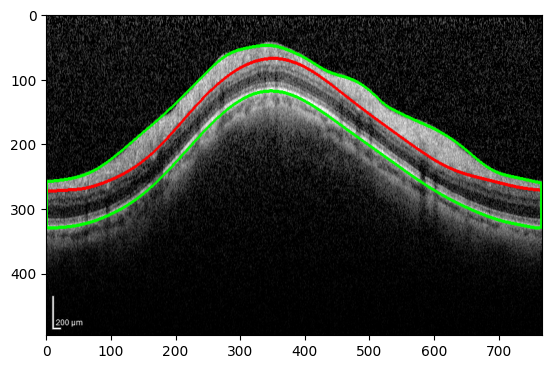

In [ ]:
import pandas as pd
import random

# Read information from document data_info.csv using the PANDAS read_csv function.
OCTdf = pd.read_csv('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/data_info.csv') #change the path
print(OCTdf)
# Generate random number between 0 len(Dataframe)-1 and select an image from the dataset at random.
num = random.randint(0, len(OCTdf)-1)
nom_fich = OCTdf.ID[num]
print(nom_fich)

# Read the images and the masks
imagen = cv2.imread('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/images/' + nom_fich) #change the path
rnfl_mask = cv2.imread('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/RNFL_masks/' + nom_fich, 0) #change the path
retina_mask = cv2.imread('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/retina_masks/' + nom_fich, 0) #change the path

#Call the OCT_visualizer function
OCT_visualizer(imagen, rnfl_mask, retina_mask)

**EXERCISE 2**. Develop a function that, given an image and the mask delimiting the RNFL layer, stores in a list the following one-dimensional statistics of the retinal layer in question:
- Position parameters: mean, median
- Dispersion parameters: Standard deviation
- Asymmetry parameters: Skewness and kurtosis
- Other parameters: Minimum and maximum

**Note**: As a **first step** you must obtain the **NFLR thickness** for each point and store it in a list.

Function header: `features_RNFL = OneDim_statistics_extractor(image, RNFL_mask)`.

In [ ]:
import numpy as np
from scipy import stats

def OneDim_statistics_extractor(image, RNFL_mask):
  # Compute the RNFL thickness from the mask
  thickness = np.sum(RNFL_mask, axis=1)

  # Characteristics based on measures of central tendency: mean,median
  mean = np.mean(thickness)
  median = np.median(thickness)

  # Characteristics based on measures of dispersion: standard deviation
  standev = np.std(thickness)

  # Asymmetry characteristics:Skewness and kurtosis
  assymetry = stats.skew(thickness)
  kurtosis = stats.kurtosis(thickness)

  # Other characteristics: minumum, maximum
  minimum = np.min(thickness)
  maximum = np.max(thickness)

  # (fingerprint RNFL)
  features_RNFL = [mean, median, standev, assymetry, kurtosis, minimum, maximum] # one-dimensional statistics
  print(features_RNFL)

  return features_RNFL

In [ ]:
import numpy as np
from scipy import stats

imagen = cv2.imread('/content/drive/MyDrive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/images/OCT006OD.png') #change the path
rnfl_mask = cv2.imread('/content/drive/MyDrive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/images/OCT006OD.png') #change the path


np.sum(rnfl_mask, axis=1).shape
#print(rnfl_mask)


(496, 3)

**EXERCISE 3**. Develop a function that, given an image and the mask that delimits the retina of the background, stores the following concatenated feature vectors in a list:
- Feature vector relative to the cooccurrence matrix computing the following cooccurrence matrix metrics: Contrast, Dissimilarity, Homogeneity, ASM, Energy, Correlation.
- Feature vector relative to the computation of the Local Binary Patterns. Calculate the histogram of the uniform LBP image obtained for a radius `R=1` and neighbourhood `P=8*R`.

**Note 1**: To do this, you must first delimit the area of interest of the retina from the bounding box (BB) extracted from the mask.

**Note 2**: For the calculation of the co-occurrence matrix use: `distances=[2]`, `angles=[90]`, `levels=256`, `symmetric=True`, `normed=True`. Check the documentation for the effect of these input parameters.

**Note 3**: For both the extraction of the retinal BB, the computation of the cooccurrence matrix (and related metrics) as well as the LBP image, it is recommended to use the *feature* module of the *scikit-image* library.

**Function header: `features_retina = twoDim_feature_extractor(image, retina_mask)`**

In [ ]:
# CARACTERÍSTICAS BIDIMENSIONALES en la estructura de la RETINA
from skimage.measure import regionprops # Propiedades de un Objeto Conexo
from skimage.feature import graycomatrix, graycoprops # Matriz coocurrencia
from skimage.feature import local_binary_pattern # Computo de los LBP
import numpy as np
import cv2

def twoDim_feature_extractor(image, retina_mask):
  ##### Retina AoI selection
  # Obtain properties of the retinal mask
  prop = regionprops(retina_mask)
  # Bounding Box Coordinate extraction
  bb = prop[0].bbox
  # Apply cropping on OCT image
  retina = image[bb[0]:bb[2],bb[1]:bb[3],0]

  ##### Gray-Level Coocurrence Matrix (GLCM)
  # Computation of the cooccurrence matrix
  glcm = graycomatrix(retina, distances=[2], angles=[90], levels=256, symmetric=True, normed=True)
  # Compute the metrics associated with the co-occurrence matrix.
  contraste = graycoprops(glcm, 'contrast')[0][0]
  disimilitud = graycoprops(glcm, 'dissimilarity')[0][0]
  homogeneidad = graycoprops(glcm, 'homogeneity')[0][0]
  ASM = graycoprops(glcm, 'ASM')[0][0]
  energia = graycoprops(glcm, 'energy')[0][0]
  correlacion = graycoprops(glcm, 'correlation')[0][0]



  ##### Local Binary Patterns (LBP)
  # LBP computation
  radius = 1
  P = 8 * radius
  lbp_image = local_binary_pattern(retina, P, radius, method='uniform')

  # Convert LBP image to 8-bit unsigned integer type
  lbp_image = np.uint8(lbp_image)

  # Histogram extraction
  hist_lbp = cv2.calcHist([lbp_image], [0], None, [P+2], [0, P+2])
  hist_lbp = hist_lbp.astype('float')
  hist_lbp /= (hist_lbp.sum() + 1e-7)
  hist_lbp = hist_lbp.tolist()
  hist_lbp = [item for sublist in hist_lbp for item in sublist]

  # Texture features (fingerprint retina)
  features_Retina = [contraste, disimilitud, homogeneidad, ASM, energia, correlacion] + hist_lbp # Características bidimensionales
  # print(features_Retina)

  return features_Retina

**EXERCISE 4**. In this last exercise you must perform a function that given the OCT dataframe of exercise 1 in which the information of the data triples is found, the method generates a holistic matrix of features. This matrix must include for each instance the vector of one-dimensional statistics from the RNFL layer together with the *feature vector* from the 2D retinal feature extraction. Additionally, in the last column of each holistic *feature vector* you must include a GT tag. To do so, read the *Class* field of the OCT dataframe and set a "0" if `Class=="Healthy"` and a "1" otherwise.

**Note**: Store the holistic feature matrix in an HDF5 file named `"OCTfeatureMatrix.hdf5"`.

**Function header: `featureMatrix = holisticMatrixComputation(data_path)`**

In [ ]:
import pandas as pd
import numpy as np

def holisticMatrixComputation(df):
  fingerprint = []
  for index, row in df.iterrows():
    # Image reading according to Dataframe row
    img_id = row["ID"]
    image = cv2.imread(f'/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/images/{img_id}') #change the path
    RNFL_mask = cv2.imread(f'/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/RNFL_masks/{img_id}', 0) #change the path
    retina_mask = cv2.imread(f'/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/retina_masks/{img_id}', 0) #change the path



    # Feature extraction for a triplet
    features_RNFL = OneDim_statistics_extractor(image, RNFL_mask)
    features_Retina = twoDim_feature_extractor(image, retina_mask)

    # Extract the class information
    etiqueta = 0 if row["Class"] == "Healthy" else 1


    # Computing the holistic vector by linking features and GT
    fingerprint.append(features_RNFL + features_Retina + [etiqueta])
    # print(np.shape(fingerprint))

  featureMatrix = np.array(fingerprint)
  # print(np.shape(matriz_datos))

  np.save('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/Data/OCTfeatureMatrix.hdf5', featureMatrix) #change the path

  return featureMatrix

# Call the method to compute the holistic matrix of my dataset
holisticMatrixComputation(OCTdf)

[np.float64(8911.633064516129), np.float64(0.0), np.float64(23494.115189612432), np.float64(2.8680381736464855), np.float64(7.7671999175789495), np.uint64(0), np.uint64(121125)]
[np.float64(11121.290322580646), np.float64(0.0), np.float64(22393.962095958566), np.float64(1.6489676820756223), np.float64(0.9220998609215338), np.uint64(0), np.uint64(71910)]
[np.float64(10661.15927419355), np.float64(0.0), np.float64(34816.374010090694), np.float64(3.3538583536343447), np.float64(10.023824704032082), np.uint64(0), np.uint64(176970)]
[np.float64(11956.723790322581), np.float64(0.0), np.float64(33780.05114032038), np.float64(2.879292596400834), np.float64(7.116931111255546), np.uint64(0), np.uint64(154020)]
[np.float64(11809.6875), np.float64(0.0), np.float64(13596.703420475122), np.float64(0.444084750711172), np.float64(-1.521072059312642), np.uint64(0), np.uint64(41055)]


array([[ 8.91163306e+03,  0.00000000e+00,  2.34941152e+04,
         2.86803817e+00,  7.76719992e+00,  0.00000000e+00,
         1.21125000e+05,  5.43368430e+02,  1.66105260e+01,
         7.64276489e-02,  2.01625000e-04,  1.41994718e-02,
         9.35173653e-01,  4.66245994e-02,  7.58814103e-02,
         6.86598558e-02,  1.43910256e-01,  2.04767628e-01,
         1.31780849e-01,  7.41286058e-02,  6.73577724e-02,
         8.84114583e-02,  9.84775641e-02,  1.00000000e+00],
       [ 1.11212903e+04,  0.00000000e+00,  2.23939621e+04,
         1.64896768e+00,  9.22099861e-01,  0.00000000e+00,
         7.19100000e+04,  4.93513516e+02,  1.31550097e+01,
         1.66674694e-01,  5.45480984e-03,  7.38566845e-02,
         9.53607824e-01,  3.38623047e-02,  6.15478516e-02,
         5.94563802e-02,  1.47615560e-01,  2.24202474e-01,
         1.36206055e-01,  6.71468099e-02,  4.60286458e-02,
         1.56372070e-01,  6.75618490e-02,  1.00000000e+00],
       [ 1.06611593e+04,  0.00000000e+00,  3.48163740e

# GLAUCOMA DETECTION

**This excercise is complementary and optional**

In this optional excercise the development of a diagnostic aid system for the detection of glaucoma, a binary classification problem (glaucoma vs. normal), is proposed. For this purpose, the OCT image features extracted from the previous practice will be used. A data file containing these extracted features will be provided for a set of images, in total 192 images.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# We read information about the features contained in the data file using numpy's load function.
data = np.load('/content/drive/My Drive/2025-2026/Advanced_TELECO/Practical_Session/Session1/data.npy', allow_pickle=True)

# We separate X (the features we are going to use to train the algorithm) and y (the labels).
X = data[:,:-1] # data
y = data[:,-1] # target
print(np.shape(X))
print(np.shape(y))

(192, 23)
(192,)


Implement and train a multilayer perceptron. To do so, follow the steps below:

* Divide the data into training and test sets   
* Normalise the data
*   Define the architecture
*   Compile the model
*   Train the network
*   Validate the model with the test set




In [ ]:
# 2) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 3) Train-only normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X.shape, y.shape, X_train.shape, X_test.shape

((192, 23), (192,), (144, 23), (48, 23))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

tf.random.set_seed(42)

input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # binary output
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.AUC(name='auc'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
    ],
)


In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_auc', mode='max', patience=20, restore_best_weights=True
    )
]

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6341 - auc: 0.4998 - loss: 0.7188 - precision: 0.6704 - recall: 0.2345 - val_accuracy: 0.6207 - val_auc: 0.8382 - val_loss: 0.6614 - val_precision: 1.0000 - val_recall: 0.3529
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7462 - auc: 0.7923 - loss: 0.5898 - precision: 0.9703 - recall: 0.4030 - val_accuracy: 0.7241 - val_auc: 0.9461 - val_loss: 0.5711 - val_precision: 1.0000 - val_recall: 0.5294
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8007 - auc: 0.9006 - loss: 0.4974 - precision: 0.8622 - recall: 0.6011 - val_accuracy: 0.7241 - val_auc: 0.9583 - val_loss: 0.5044 - val_precision: 1.0000 - val_recall: 0.5294
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8948 - auc: 0.9431 - loss: 0.4328 - precision: 0.9241 - recall: 0.8165 - val_accuracy: 0.7586 - val_auc: 0.9632 - val_loss: 0.4576 - val_precision: 1.0000 - val_recall: 0.5882
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

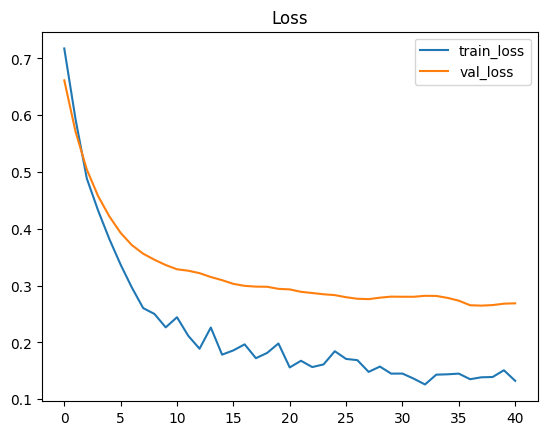

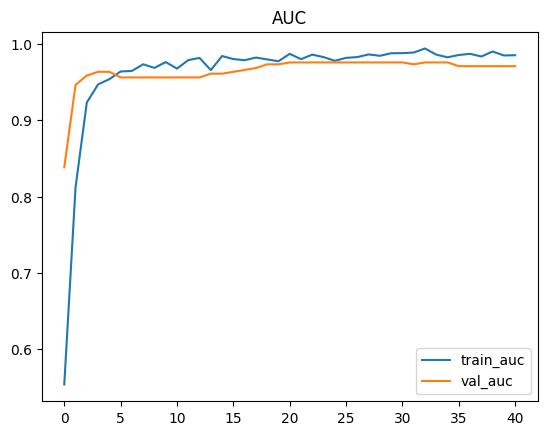

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss'); plt.show()

plt.figure()
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend(); plt.title('AUC'); plt.show()


{'loss': 0.16653050482273102, 'compile_metrics': 0.9375}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Classification report:
               precision    recall  f1-score   support

         0.0      0.958     0.920     0.939        25
         1.0      0.917     0.957     0.936        23

    accuracy                          0.938        48
   macro avg      0.938     0.938     0.937        48
weighted avg      0.938     0.938     0.938        48

Confusion matrix:
 [[23  2]
 [ 1 22]]
Test ROC-AUC: 0.9860869565217392


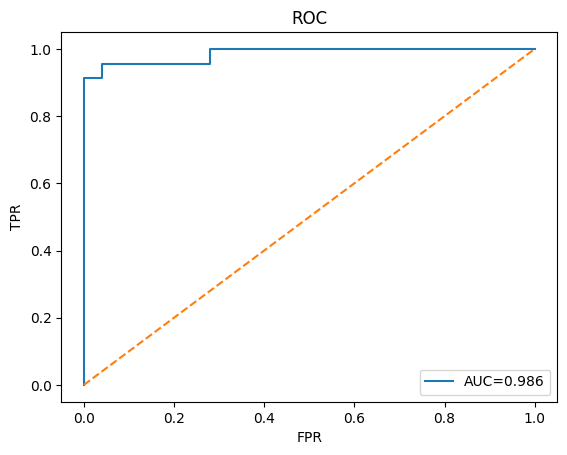

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Metrics from Keras
test_metrics = model.evaluate(X_test, y_test, verbose=0)
print(dict(zip(model.metrics_names, test_metrics)))

# Predictions → class labels
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))

# ROC curve
fpr, tpr, thr = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC'); plt.legend(); plt.show()
